# Read Dataset

In [1]:
import pandas as pd

from sklearn.datasets import make_regression

df = pd.read_csv("../datasets/dummy_sample_multi_regression.csv")
df.sample(5)

,feature_1,feature_2,feature_3,feature_4,feature_5,y (target)
7,-1.959670,-1.328186,-1.220844,0.196861,0.208864,-223.546018
9,-1.607483,0.184634,0.227460,0.259883,1.307143,76.765982
3,-1.106335,-1.196207,-0.479174,0.812526,-0.185659,-53.724008
21,0.067528,-1.424748,1.465649,-0.544383,-0.225776,198.424251
23,0.241962,-1.913280,-0.463418,-1.724918,-0.465730,-47.131843


# Scatter Matrix Plot

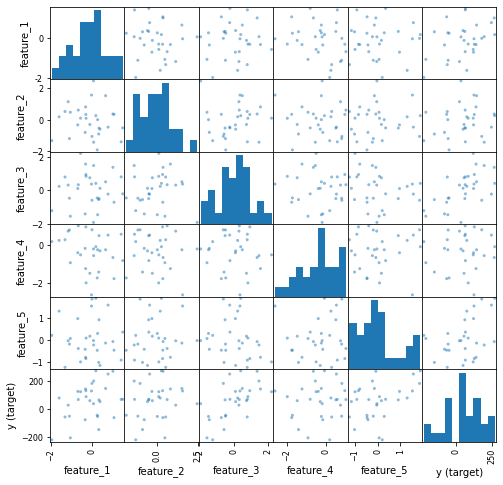

In [2]:
pd.plotting.scatter_matrix(df, figsize=(8, 8));

# Dataset Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   30 non-null     float64
 1   feature_2   30 non-null     float64
 2   feature_3   30 non-null     float64
 3   feature_4   30 non-null     float64
 4   feature_5   30 non-null     float64
 5   y (target)  30 non-null     float64
dtypes: float64(6)
memory usage: 1.5 KB


# Split Dataset

In [4]:
X = df.iloc[:, :5].to_numpy()
y = df.iloc[:, -1].to_numpy()

# Build Model

Model yang digunakan adalah regresi linier berganda. Regresi linier berganda dapat dirumuskan dengan persamaan $y = Wx_1 + Wx_2 +\ ...\ + Wx_n + b$, dimana $y = prediksi$, $W = Weight~(bobot)$, $x_{1..n} = fitur$, dan $b = bias$. Model regresi linier mencari nilai $W$ dan $b$ yang sesuai sehingga *error* yang dihasilkan dari prediksi menjadi sekecil mungkin.

Jika anda mengalami kesulitan dalam mengerti persamaan matematikanya, penjelasan lainnya secara konsep adalah membuat sebuah garis lurus lalu posisikan garis lurus tersebut sedemikian rupa sehingga bisa menghampiri semua sampel.

## Train Model

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

print(f"Weight : {model.coef_}")
print(f"Bias   : {model.intercept_}")

Weight : [64.21526183 23.20026447 91.13432805 33.46675125 76.31920232]
Bias   : 64.53505507678463


## Prediction

In [6]:
y_preds = model.predict(X)
y_preds

array([ 137.66110103,  260.00449602, -112.15924488,  -64.90681261,
        153.18532567,  -37.21023601,   69.90759012, -180.85209936,
        161.17753506,   94.78058608,  144.41918383,  -19.37085729,
        -57.77651753,  220.26821738,   81.50140759,   62.49251489,
        114.66817875,  168.34037625,   65.99877604, -159.54972682,
        -21.36230702,  133.93798903,   81.02000339,  -99.82066134,
        -12.77047296, -142.57537797,  233.88144059,  103.00953923,
        105.83580265,  127.59164441])

# Evaluate

## R-Squared, Explained Variance, and RMSE (Root Mean Square Error)

- [R-Squared Explanantion](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination)
- [Mean Squared Error Explanation](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)

In [7]:
from sklearn.metrics import r2_score, mean_squared_error

y_preds = model.predict(X)

print(f"r2_score                 : {r2_score(y, y_preds)}")
print(f"root_mean_squared_error  : {mean_squared_error(y, y_preds, squared=False)}")

r2_score                 : 0.8787174563282879
root_mean_squared_error  : 43.819100608961925


## Residual Plot

[Interpreting Residual Plot](https://www.qualtrics.com/support/stats-iq/analyses/regression-guides/interpreting-residual-plots-improve-regression/)

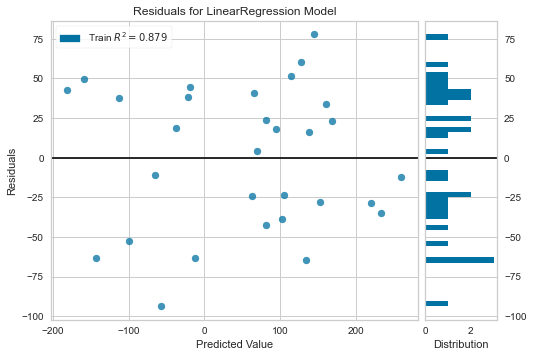

In [8]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(model)
visualizer.fit(X, y)
visualizer.show();

***
Semoga bermanfaat yah 😄

*Dibuat dengan penuh 💚 oleh [haloapping](https://haloapping.github.io/)*
***